In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.pylabtools import figsize

%matplotlib inline

## To check if the toolbox is working properly, classic Cart-Pole problem is considered.
## RL agent is trained to balance a pole on a cart as long as possible.

# 1. Various force magnitude experiment
To investigate system behaviour 3 values of force magnitude we considered:
* `small` - force magnitude is significantly smaller than mass of a cart. 5 N
* `moderate` - force magnitude is slightly bigger than mass of a cart. 11 N
* `big` - force magnitude is significantly bigger than mass of a cart. 17 N

For each value 5 experiments with the following parameter were done:
* n_episodes = 100 - number of episodes to perform in each experiment run.
* force - magnitude to be applied during experiment at each time step.
* m_trolley = 10 - mass of a cart.
* m_load = 1 - mass of a pole.
* phi1_start = 85 degrees in rad - angle of the pole.
* w1_start = 0 - angle speed of the poles mass center.
* time_step = 0.05s - time difference between simulation steps.
* positive_reward = 1 - positive reward for RL agent.
* negative_reward = -100 - negative reward for RL agent.

Episodes lengths of each training step of each experiment was saved, as well as real execution time for each experiment.

In [2]:
df_small_f_ep_ls = pd.read_csv("./experiment_5_100_10_1_85_0_0.05_1_-100_5_episodes_lengths.csv", header=None)
df_small_f_ex_ts = pd.read_csv("./experiment_5_100_10_1_85_0_0.05_1_-100_5_exec_times.csv", header=None)
df_medium_f_ep_ls = pd.read_csv("./experiment_5_100_10_1_85_0_0.05_1_-100_11_episodes_lengths.csv", header=None)
df_medium_f_ex_ts = pd.read_csv("./experiment_5_100_10_1_85_0_0.05_1_-100_11_exec_times.csv", header=None)
df_big_f_ep_ls = pd.read_csv("./experiment_5_100_10_1_85_0_0.05_1_-100_17_episodes_lengths.csv", header=None)
df_big_f_ex_ts = pd.read_csv("./experiment_5_100_10_1_85_0_0.05_1_-100_17_exec_times.csv", header=None)

### First, let's take a look at each experiment.
### To smooth data we will use moving average with window size 20

Time per simulation step in each experiment: [0.11945892 0.11663205 0.11709229 0.11850182 0.11766915] s
Mean time per simulation step: 0.118 s, std: 0.001 s
Total execution time: 547.985 s for 4649 steps -> 0.118 s per step


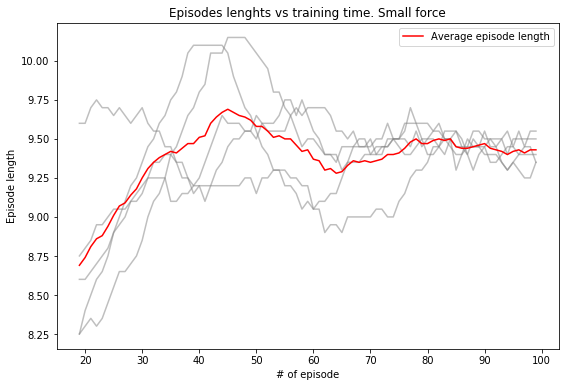

In [69]:
def print_exec_time_summary(df_ep_ls, df_ex_ts):
    n_steps_in_exp = df_ep_ls.sum(axis=0).values
    t_per_step = df_ex_ts[0].values / n_steps_in_exp
    tot_ex_t = df_ex_ts.values.sum()
    tot_n_steps = n_steps_in_exp.sum()
    avg_per_step = tot_ex_t / tot_n_steps
    print("Time per simulation step in each experiment: {} s".format(t_per_step))
    print("Mean time per simulation step: {:.3f} s, std: {:.3f} s".format(t_per_step.mean(), t_per_step.std()))
    print("Total execution time: {:.3f} s for {} steps -> {:.3f} s per step". format(tot_ex_t, tot_n_steps, avg_per_step))
    
def plot_ep_lens(df, title_spec):
    transformed = df.rolling(window=20, min_periods=20, axis=0).mean()[19:]
    transformed['avg'] = transformed.mean(axis=1)
    plt.plot(transformed.index, transformed[[0,1,2,3,4]], 'gray', 
             alpha=0.5)
    plt.plot(transformed.index, transformed['avg'], 'red', label="Average episode length")
    plt.title("Episodes lenghts vs training time. {}".format(title_spec))
    plt.xlabel("# of episode")
    plt.ylabel("Episode length")
    plt.legend()
    
plot_ep_lens(df_small_f_ep_ls, "Small force")
print_exec_time_summary(df_small_f_ep_ls, df_small_f_ex_ts)

Time per simulation step in each experiment: [0.11470015 0.11310535 0.113361   0.11199419 0.11146657] s
Mean time per simulation step: 0.113 s, std: 0.001 s
Total execution time: 951.780 s for 8443 steps -> 0.113 s per step


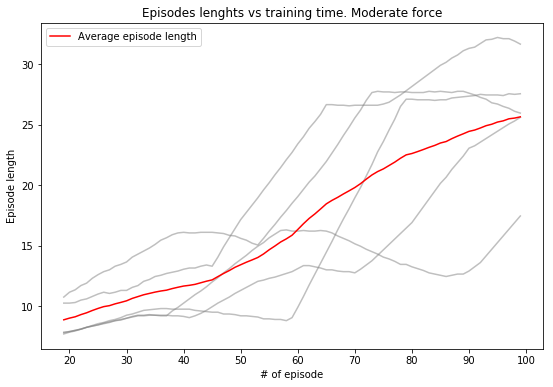

In [71]:
print_exec_time_summary(df_medium_f_ep_ls, df_medium_f_ex_ts)
plot_ep_lens(df_medium_f_ep_ls, "Moderate force")

Time per simulation step in each experiment: [0.11227927 0.11286873 0.1093424  0.11205407 0.11104163] s
Mean time per simulation step: 0.112 s, std: 0.001 s
Total execution time: 1275.539 s for 11468 steps -> 0.111 s per step


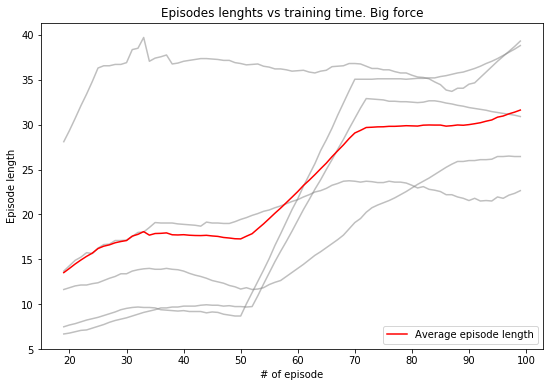

In [72]:
plot_ep_lens(df_big_f_ep_ls, "Big force")
print_exec_time_summary(df_big_f_ep_ls, df_big_f_ex_ts)

## We observe that episode length (our target variable) growth for moderate and big magnitude of force applied. Moreover, with bigger force magnitude higher value of average episode length can be reached. 
## However, if force is significantly smaller than mass of a cart, agent fails to train. We observe plato in episode length. This is because with such a small magnitude of force, it is is not possible to balance poll with the given constraints. 

## Execution time per simulation step is almost the same in all experiments.

--------------------------------